# Indexing Assets
This is a project to easily visualize different assets classes while they are indexed to see which assets ACTUALLY performed in that time period!

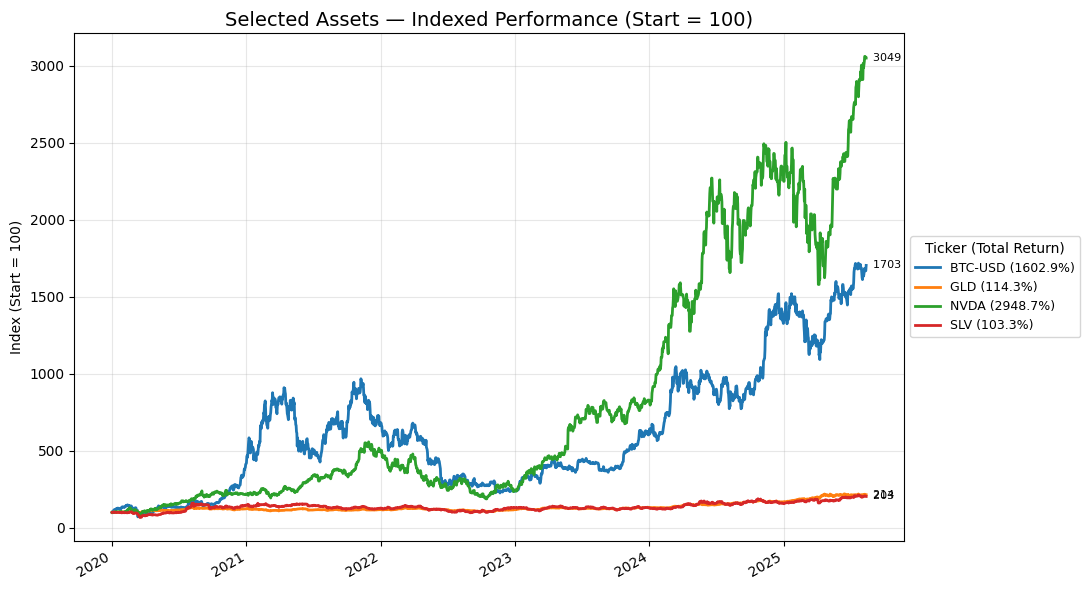


Total Return (%) from start → end
         Total %
Ticker          
NVDA     2948.69
BTC-USD  1602.94
GLD       114.35
SLV       103.33


In [12]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 1) Pick your tickers + dates
tickers = ["NVDA", "SLV", "GLD", "BTC-USD"] # Change these to using "Ticker" and separate it using ,
start = "2020-01-01"   # This is the starting date, change if you like
end   = None           # This is the ending date, None = today, You can also choose a date you want.

# 2) Download prices (auto_adjust=True returns split/dividend-adjusted OHLC)
raw = yf.download(tickers, start=start, end=end, auto_adjust=True, progress=False)

# 3) Get a 2D table of adjusted Close prices
data = (raw['Close'] if isinstance(raw.columns, pd.MultiIndex) 
        else raw[['Close']].rename(columns={'Close': tickers[0]}))

# 4) Clean + index to 100 on the first day
data = data.ffill().dropna()           # fill tiny gaps, drop leading NaN rows
indexed = data / data.iloc[0] * 100    # normalize to 100
# Total return from start to end
tot_ret = (indexed.iloc[-1] / indexed.iloc[0] - 1).sort_values(ascending=False)

# Rename columns to include % in legend labels
nice = indexed.copy()
nice.columns = [f"{t} ({tot_ret[t]*100:.1f}%)" for t in indexed.columns]

# 5) Plot
ax = nice.plot(figsize=(11,6), linewidth=2)
plt.title("Selected Assets — Indexed Performance (Start = 100)", fontsize=14)
plt.ylabel("Index (Start = 100)")
plt.xlabel("")
plt.grid(True, alpha=0.3)

# Put legend outside to avoid clutter
plt.legend(title="Ticker (Total Return)", fontsize=9, loc="center left", bbox_to_anchor=(1.0, 0.5))

# Optional: annotate last value at line endpoints
last = nice.iloc[-1]
for col in nice.columns:
    ax.text(nice.index[-1], last[col], f"  {last[col]:.0f}", va='center', fontsize=8)

plt.tight_layout()
plt.show()

# Neat table of returns
print("\nTotal Return (%) from start → end")
print((tot_ret*100).round(2).to_frame("Total %"))